In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
filename = 'data/bq_results_09082022.csv'
df = pd.read_csv(filename, dtype={"ping_average_latency": float, 
                                  "iperf_throughput_1_thread": float,
                                  "iperf_throughput_32_thread": float})

/tmp/ipykernel_24845/2204186336.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,20,45,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, dtype={"ping_average_latency": float,


In [3]:
################# Data prep #################
df[['vm_1_gce_network_tier',
    'vm_2_gce_network_tier']] = df[['vm_1_gce_network_tier',
                                    'vm_2_gce_network_tier']].fillna(value='premium')
df[['tcp_max_receive_buffer']] = df[['tcp_max_receive_buffer']].fillna(value=6291456)
# df = df.set_index('thedate')
query = 'vm_1_machine_type == "n1-standard-16" and ip_type == "internal" and vm_1_gce_network_tier == "premium" and tcp_congestion_control == "bbr" and sending_zone != "asia-east2-a"'
df = df.query(query)
df = df[df['iperf_throughput_1_thread'].notnull()]
df = df[df['ping_average_latency'].notnull()]
df = df[df['sending_zone'].notnull()]
df = df[df['receiving_zone'].notnull()]
df = df[df['thedate'].notnull()]
# df = df[df['vm_1_cloud'].notnull()]
# df = df[df['vm_2_cloud'].notnull()]
df[['pandas_datetime']] = df[['thedate']].apply(pd.to_datetime)
df = df[df['pandas_datetime'] > '03/03/2022']
df.reset_index(inplace=True,drop=True)

df.sort_values(by=['iperf_timestamp', 'run_uri'], inplace=True, ascending=True)
# df = df[df['pandas_datetime'] > '03/18/2022']
# df = df[df['pandas_datetime'] < '07/31/2022']
df.reset_index(inplace=True,drop=True)

In [4]:
df.shape

(73515, 89)

In [5]:
# pd.to_datetime(df.thedate).shape

In [6]:
df

run_uri vm_1_cloud vm_2_cloud  \
0      1051f3d7-eb9e3409-0f4a-42d3-8ae5-e0e04a1ed7ba        GCP        GCP   
1      1051f3d7-eb9e3409-0f4a-42d3-8ae5-e0e04a1ed7ba        GCP        GCP   
2      bb7b4dc0-d4d9fd3e-d6a2-46b1-ba82-c6c1e6132e58        GCP        GCP   
3      6e9bce8c-aa266843-5447-4ea4-b771-f0f47a5810ba        GCP        GCP   
4      01ef994d-c2abd012-c303-405c-b5d5-af45f9032612        GCP        GCP   
...                                              ...        ...        ...   
73510  0943dc4d-493e3cda-08b5-45c6-b898-47b542b0aeba        GCP        GCP   
73511  3a4e0e11-0cee5a73-edc8-4139-ae4f-3e2ffd674c97        GCP        GCP   
73512  3a4e0e11-0cee5a73-edc8-4139-ae4f-3e2ffd674c97        GCP        GCP   
73513  6533dd43-1ebc386e-959a-4566-b19e-69e7bb30c963        GCP        GCP   
73514  6533dd43-1ebc386e-959a-4566-b19e-69e7bb30c963        GCP        GCP   

            sending_zone             receiving_zone vm_1_machine_type  \
0             us-east4-c                 us-west1-b    n1-standard-16   
1             us-west1-b                 us-east4-c    n1-standard-16   
2         europe-west3-c          asia-southeast2-a    n1-standard-16   
3      asia-northeast1-b             europe-west2-c    n1-standard-16   
4         europe-west1-b  northamerica-northeast1-a    n1-standard-16   
...                  ...                        ...               ...   
73510      us-central1-c     australia-southeast1-b    n1-standard-16   
73511      us-central1-c          asia-southeast1-b    n1-standard-16   
73512  asia-southeast1-b              us-central1-c    n1-standard-16   
73513     europe-west1-b              us-central1-c    n1-standard-16   
73514      us-central1-c             europe-west1-b    n1-standard-16   

      vm_2_machine_type   ip_type vm_1_gce_network_tier vm_2_gce_network_tier  \
0        n1-standard-16  internal               premium               premium   
1        n1-standard-16  internal               premium               premium   
2        n1-standard-16  internal               premium               premium   
3        n1-standard-16  internal               premium               premium   
4        n1-standard-16  internal               premium               premium   
...                 ...       ...                   ...                   ...   
73510    n1-standard-16  internal               premium               premium   
73511    n1-standard-16  internal               premium               premium   
73512    n1-standard-16  internal               premium               premium   
73513    n1-standard-16  internal               premium               premium   
73514    n1-standard-16  internal               premium               premium   

       ... ipert_rtt_1_thread ipert_rtt_4_threads ipert_rtt_32_threads  \
0      ...            56369.0                 NaN         56539.016667   
1      ...            56258.0                 NaN         56604.013021   
2      ...           209389.0                 NaN        205033.055729   
3      ...           215693.0                 NaN        217712.992188   
4      ...            81676.0                 NaN         82599.866146   
...    ...                ...                 ...                  ...   
73510  ...           175753.0                 NaN        176869.740104   
73511  ...           215691.0                 NaN        205705.606250   
73512  ...           207786.0                 NaN        209036.405729   
73513  ...           103709.0                 NaN        104194.358333   
73514  ...           103833.0                 NaN        104228.340104   

       ipert_rtt_unit_1_thread ipert_rtt_unit_4_threads  \
0                           us                      NaN   
1                           us                      NaN   
2                           us                      NaN   
3                           us                      NaN   
4                           us                      NaN   
...            

In [7]:
df.columns

Index(['run_uri', 'vm_1_cloud', 'vm_2_cloud', 'sending_zone', 'receiving_zone',
       'vm_1_machine_type', 'vm_2_machine_type', 'ip_type',
       'vm_1_gce_network_tier', 'vm_2_gce_network_tier', 'ping_unit',
       'vm_1_kernel_release', 'vm_2_kernel_release', 'rmem_max',
       'tcp_congestion_control', 'tcp_max_receive_buffer',
       'tcp_max_send_buffer', 'vm_1_wmem_max', 'ping_interval_time_us',
       'ping_transaction_count', 'thedate', 'ping_timestamp',
       'ping_max_latency', 'ping_min_latency', 'ping_average_latency',
       'ping_latency_std_dev', 'sending_machine_type',
       'receiving_machine_type', 'timestamp', 'TCP_RR_Latency_p90',
       'TCP_RR_Latency_p99', 'TCP_RR_Latency_p50', 'TCP_RR_Latency_stddev',
       'TCP_RR_Latency_mean', 'TCP_RR_Transaction_Rate',
       'TCP_RR_Latency_Histogram', 'TCP_RR_Latency_max', 'TCP_RR_Latency_min',
       'UDP_RR_Latency_max', 'UDP_RR_Latency_p90', 'UDP_RR_Latency_min',
       'UDP_RR_Latency_mean', 'UDP_RR_Latency_p50', '

In [8]:
df['vm_1_kernel_release']

0        5.11.0-1029-gcp
1        5.11.0-1029-gcp
2        5.11.0-1029-gcp
3        5.11.0-1029-gcp
4        5.11.0-1029-gcp
              ...       
73510    5.15.0-1013-gcp
73511    5.15.0-1013-gcp
73512    5.15.0-1013-gcp
73513    5.15.0-1013-gcp
73514    5.15.0-1013-gcp
Name: vm_1_kernel_release, Length: 73515, dtype: object

In [9]:
def split_kernel_major(kernel_release):
  kernel_split = kernel_release.split('.')
  major_version = int(kernel_split[0])
  return major_version

def split_kernel_minor(kernel_release):
  kernel_split = kernel_release.split('.')
  minor_version = int(kernel_split[1])
  return minor_version

def kernel_version(kernel_release):
  kernel_split = kernel_release.split('.')
  version = float(kernel_split[0] + '.' + kernel_split[1])
  return version

In [10]:
df['kernel_major_version'] = df['vm_1_kernel_release'].apply(split_kernel_major)
df['kernel_minor_version'] = df['vm_1_kernel_release'].apply(split_kernel_minor)
df['kernel_version'] = df['vm_1_kernel_release'].apply(kernel_version)

In [11]:
df['kernel_major_version']

0        5
1        5
2        5
3        5
4        5
        ..
73510    5
73511    5
73512    5
73513    5
73514    5
Name: kernel_major_version, Length: 73515, dtype: int64

In [12]:
df['kernel_minor_version']

0        11
1        11
2        11
3        11
4        11
         ..
73510    15
73511    15
73512    15
73513    15
73514    15
Name: kernel_minor_version, Length: 73515, dtype: int64

In [13]:
df['kernel_version']

0        5.11
1        5.11
2        5.11
3        5.11
4        5.11
         ... 
73510    5.15
73511    5.15
73512    5.15
73513    5.15
73514    5.15
Name: kernel_version, Length: 73515, dtype: float64

In [14]:
df.pandas_datetime

0       2022-03-03 02:53:11.661342+00:00
1       2022-03-03 02:54:22.163647+00:00
2       2022-03-03 03:11:38.292288+00:00
3       2022-03-03 03:11:47.957814+00:00
4       2022-03-03 03:11:54.814871+00:00
                      ...               
73510   2022-08-09 00:04:08.747441+00:00
73511   2022-08-09 00:06:41.887435+00:00
73512   2022-08-09 00:07:55.446792+00:00
73513   2022-08-09 00:50:37.377586+00:00
73514   2022-08-09 00:51:48.045485+00:00
Name: pandas_datetime, Length: 73515, dtype: datetime64[ns, UTC]

## Decompose date_time into day of week and time of day

In [15]:
df['pandas_datetime']

0       2022-03-03 02:53:11.661342+00:00
1       2022-03-03 02:54:22.163647+00:00
2       2022-03-03 03:11:38.292288+00:00
3       2022-03-03 03:11:47.957814+00:00
4       2022-03-03 03:11:54.814871+00:00
                      ...               
73510   2022-08-09 00:04:08.747441+00:00
73511   2022-08-09 00:06:41.887435+00:00
73512   2022-08-09 00:07:55.446792+00:00
73513   2022-08-09 00:50:37.377586+00:00
73514   2022-08-09 00:51:48.045485+00:00
Name: pandas_datetime, Length: 73515, dtype: datetime64[ns, UTC]

In [16]:
df['pandas_datetime'].dt.dayofweek

0        3
1        3
2        3
3        3
4        3
        ..
73510    1
73511    1
73512    1
73513    1
73514    1
Name: pandas_datetime, Length: 73515, dtype: int64

In [17]:
df['pandas_datetime'].dt.hour

0        2
1        2
2        3
3        3
4        3
        ..
73510    0
73511    0
73512    0
73513    0
73514    0
Name: pandas_datetime, Length: 73515, dtype: int64

In [18]:
df['pandas_datetime'].dt.tz_convert('US/Central')

0       2022-03-02 20:53:11.661342-06:00
1       2022-03-02 20:54:22.163647-06:00
2       2022-03-02 21:11:38.292288-06:00
3       2022-03-02 21:11:47.957814-06:00
4       2022-03-02 21:11:54.814871-06:00
                      ...               
73510   2022-08-08 19:04:08.747441-05:00
73511   2022-08-08 19:06:41.887435-05:00
73512   2022-08-08 19:07:55.446792-05:00
73513   2022-08-08 19:50:37.377586-05:00
73514   2022-08-08 19:51:48.045485-05:00
Name: pandas_datetime, Length: 73515, dtype: datetime64[ns, US/Central]

In [19]:
# import pytz
# pytz.all_timezones

In [20]:
zone_list = list(df['sending_zone'].unique())
zone_list.sort()
zone_list

['asia-east1-b',
 'asia-northeast1-b',
 'asia-northeast2-a',
 'asia-northeast3-a',
 'asia-south1-c',
 'asia-southeast1-b',
 'asia-southeast2-a',
 'australia-southeast1-b',
 'europe-north1-a',
 'europe-west1-b',
 'europe-west2-c',
 'europe-west3-c',
 'europe-west4-a',
 'europe-west6-a',
 'northamerica-northeast1-a',
 'southamerica-east1-b',
 'us-central1-c',
 'us-east1-b',
 'us-east4-c',
 'us-west1-b',
 'us-west2-a',
 'us-west3-a',
 'us-west4-a']

In [21]:
zone_time_map = {
  'asia-east1': 'Asia/Taipei',
  'asia-east2': 'Asia/Hong_Kong',
  'asia-northeast1': 'Asia/Tokyo',
  'asia-northeast2': 'Asia/Tokyo',
  'asia-northeast3': 'Asia/Seoul',
  'asia-south1': 'Asia/Kolkata',
  'asia-southeast1': 'Asia/Singapore',
  'asia-southeast2': 'Asia/Jakarta',
  'australia-southeast1': 'Australia/Sydney',
  'europe-north1': 'Europe/Helsinki',
  'europe-west1': 'Europe/Brussels',
  'europe-west2': 'Europe/London',
  'europe-west3': 'Europe/Berlin',
  'europe-west4': 'Europe/Amsterdam',
  'europe-west6': 'Europe/Zurich',
  'northamerica-northeast1': 'America/Montreal',
  'southamerica-east1': 'America/Sao_Paulo',
  'us-central1': 'US/Central',
  'us-east1': 'US/Eastern',
  'us-east4': 'US/Eastern',
  'us-west1': 'US/Pacific',
  'us-west2': 'US/Pacific',
  'us-west3': 'US/Mountain',
  'us-west4': 'US/Pacific'
}

In [22]:
df['pandas_datetime'].dt.tz_convert('US/Central')



0       2022-03-02 20:53:11.661342-06:00
1       2022-03-02 20:54:22.163647-06:00
2       2022-03-02 21:11:38.292288-06:00
3       2022-03-02 21:11:47.957814-06:00
4       2022-03-02 21:11:54.814871-06:00
                      ...               
73510   2022-08-08 19:04:08.747441-05:00
73511   2022-08-08 19:06:41.887435-05:00
73512   2022-08-08 19:07:55.446792-05:00
73513   2022-08-08 19:50:37.377586-05:00
73514   2022-08-08 19:51:48.045485-05:00
Name: pandas_datetime, Length: 73515, dtype: datetime64[ns, US/Central]

In [23]:
# Get local time
df['sending_zone_datetime'] = df.apply(lambda row: row['pandas_datetime'].tz_convert(zone_time_map[row['sending_zone'][:-2]]), axis=1)
df['receiving_zone_datetime'] = df.apply(lambda row: row['pandas_datetime'].tz_convert(zone_time_map[row['receiving_zone'][:-2]]), axis=1)

# Remove timezone data
df['sending_zone_datetime'] = df.apply(lambda row: pd.to_datetime(row['sending_zone_datetime'].tz_localize(None).strftime("%Y/%m/%d, %H:%M:%S")), axis=1)
df['receiving_zone_datetime'] = df.apply(lambda row: pd.to_datetime(row['receiving_zone_datetime'].tz_localize(None).strftime("%Y/%m/%d, %H:%M:%S")), axis=1)

In [24]:
df['sending_zone_day'] = df['sending_zone_datetime'].dt.dayofweek
df['receiving_zone_day'] = df['receiving_zone_datetime'].dt.dayofweek
df['sending_zone_hour'] = df['sending_zone_datetime'].dt.hour
df['receiving_zone_hour'] = df['receiving_zone_datetime'].dt.hour

In [25]:
df['sending_zone_day_cos'] = np.cos(2*np.pi*df['sending_zone_day']/7)
df['sending_zone_day_sin'] = np.sin(2*np.pi*df['sending_zone_day']/7)

df['receiving_zone_day_cos'] = np.cos(2*np.pi*df['receiving_zone_day']/7)
df['receiving_zone_day_sin'] = np.sin(2*np.pi*df['receiving_zone_day']/7)

df['sending_zone_hour_cos'] = np.cos(2*np.pi*df['sending_zone_hour']/24)
df['sending_zone_hour_sin'] = np.sin(2*np.pi*df['sending_zone_hour']/24)

df['receiving_zone_hour_cos'] = np.cos(2*np.pi*df['receiving_zone_hour']/24)
df['receiving_zone_hour_sin'] = np.sin(2*np.pi*df['receiving_zone_hour']/24)

In [26]:
df['sending_zone_day'].unique()

array([2, 3, 4, 5, 6, 0, 1])

In [27]:
hour_array = np.array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
          13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [28]:
np.cos(2*np.pi*hour_array/24)

array([ 1.00000000e+00,  9.65925826e-01,  8.66025404e-01,  7.07106781e-01,
        5.00000000e-01,  2.58819045e-01,  6.12323400e-17, -2.58819045e-01,
       -5.00000000e-01, -7.07106781e-01, -8.66025404e-01, -9.65925826e-01,
       -1.00000000e+00, -9.65925826e-01, -8.66025404e-01, -7.07106781e-01,
       -5.00000000e-01, -2.58819045e-01, -1.83697020e-16,  2.58819045e-01,
        5.00000000e-01,  7.07106781e-01,  8.66025404e-01,  9.65925826e-01])

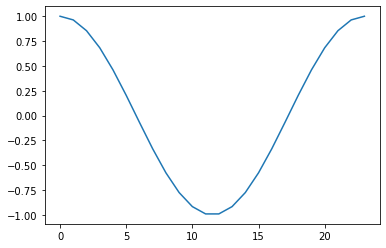

In [29]:
plt.plot(np.cos(2*np.pi*hour_array/23))

In [30]:
df

run_uri vm_1_cloud vm_2_cloud  \
0      1051f3d7-eb9e3409-0f4a-42d3-8ae5-e0e04a1ed7ba        GCP        GCP   
1      1051f3d7-eb9e3409-0f4a-42d3-8ae5-e0e04a1ed7ba        GCP        GCP   
2      bb7b4dc0-d4d9fd3e-d6a2-46b1-ba82-c6c1e6132e58        GCP        GCP   
3      6e9bce8c-aa266843-5447-4ea4-b771-f0f47a5810ba        GCP        GCP   
4      01ef994d-c2abd012-c303-405c-b5d5-af45f9032612        GCP        GCP   
...                                              ...        ...        ...   
73510  0943dc4d-493e3cda-08b5-45c6-b898-47b542b0aeba        GCP        GCP   
73511  3a4e0e11-0cee5a73-edc8-4139-ae4f-3e2ffd674c97        GCP        GCP   
73512  3a4e0e11-0cee5a73-edc8-4139-ae4f-3e2ffd674c97        GCP        GCP   
73513  6533dd43-1ebc386e-959a-4566-b19e-69e7bb30c963        GCP        GCP   
73514  6533dd43-1ebc386e-959a-4566-b19e-69e7bb30c963        GCP        GCP   

            sending_zone             receiving_zone vm_1_machine_type  \
0             us-east4-c                 us-west1-b    n1-standard-16   
1             us-west1-b                 us-east4-c    n1-standard-16   
2         europe-west3-c          asia-southeast2-a    n1-standard-16   
3      asia-northeast1-b             europe-west2-c    n1-standard-16   
4         europe-west1-b  northamerica-northeast1-a    n1-standard-16   
...                  ...                        ...               ...   
73510      us-central1-c     australia-southeast1-b    n1-standard-16   
73511      us-central1-c          asia-southeast1-b    n1-standard-16   
73512  asia-southeast1-b              us-central1-c    n1-standard-16   
73513     europe-west1-b              us-central1-c    n1-standard-16   
73514      us-central1-c             europe-west1-b    n1-standard-16   

      vm_2_machine_type   ip_type vm_1_gce_network_tier vm_2_gce_network_tier  \
0        n1-standard-16  internal               premium               premium   
1        n1-standard-16  internal               premium               premium   
2        n1-standard-16  internal               premium               premium   
3        n1-standard-16  internal               premium               premium   
4        n1-standard-16  internal               premium               premium   
...                 ...       ...                   ...                   ...   
73510    n1-standard-16  internal               premium               premium   
73511    n1-standard-16  internal               premium               premium   
73512    n1-standard-16  internal               premium               premium   
73513    n1-standard-16  internal               premium               premium   
73514    n1-standard-16  internal               premium               premium   

       ... sending_zone_hour receiving_zone_hour sending_zone_day_cos  \
0      ...                21                  18            -0.222521   
1      ...                18                  21            -0.222521   
2      ...                 4                  10            -0.900969   
3      ...                12                   3            -0.900969   
4      ...                 4                  22            -0.900969   
...    ...               ...                 ...                  ...   
73510  ...                19                  10             1.000000   
73511  ...                19                   8             1.000000   
73512  ...                 8                  19             0.623490   
73513  ...                 2                  19             0.623490   
73514  ...                19                   2             1.000000   

       sending_zone_day_sin receiving_zone_day_cos  receiving_zone_day_sin  \
0                  0.974928              -0.222521                0.974928   
1                  0.974928              -0.222521                0.974928   
2                  0.433884              -0.900969                0.433884   
3                  0.433884              -0.900969                0.4

In [31]:
count = 0
for index,row in df.iterrows():
  print(count)
  print(row['sending_zone'][:-2])
  print(row['pandas_datetime'].tz_convert(zone_time_map[row['sending_zone'][:-2]]))
  # print(row['sending_zone_datetime'])
  # timestamp = row['sending_zone_datetime'].tz_localize(None)
  # print(pd.to_datetime(row['sending_zone_datetime'].tz_localize(None).strftime("%Y/%m/%d, %H:%M:%S")))
  # print(row['sending_zone_datetime'].tz_convert('UTC'))
  count = count + 1
  if count > 10:
    break

0
us-east4
2022-03-02 21:53:11.661342-05:00
1
us-west1
2022-03-02 18:54:22.163647-08:00
2
europe-west3
2022-03-03 04:11:38.292288+01:00
3
asia-northeast1
2022-03-03 12:11:47.957814+09:00
4
europe-west1
2022-03-03 04:11:54.814871+01:00
5
us-west1
2022-03-02 19:11:58.962024-08:00
6
us-east1
2022-03-02 22:12:14.501187-05:00
7
europe-west1
2022-03-03 04:12:19.682975+01:00
8
asia-northeast2
2022-03-03 12:12:32.438142+09:00
9
us-east4
2022-03-02 22:12:41.730159-05:00
10
europe-west6
2022-03-03 04:12:47.609624+01:00


In [32]:
df.shape

(73515, 106)

In [33]:
df.vm_1_machine_type

0        n1-standard-16
1        n1-standard-16
2        n1-standard-16
3        n1-standard-16
4        n1-standard-16
              ...      
73510    n1-standard-16
73511    n1-standard-16
73512    n1-standard-16
73513    n1-standard-16
73514    n1-standard-16
Name: vm_1_machine_type, Length: 73515, dtype: object

In [34]:
one_hot_machine_type = pd.get_dummies(df['vm_1_machine_type'], dtype='float')
df = df.join(one_hot_machine_type)
one_hot_ip_type = pd.get_dummies(df['ip_type'], dtype='float')
df = df.join(one_hot_ip_type)

In [35]:
# trim vm_1_os_info field
df['vm_1_os_info_trunc'] = df['vm_1_os_info'].str.extract(r'(\w+\s+\d+.\d+).\d+\s+\w+')

In [36]:
one_hot_congestion_control = pd.get_dummies(df['tcp_congestion_control'], dtype='float')
df = df.join(one_hot_congestion_control)
one_hot_vm_1_os_info_trunc = pd.get_dummies(df['vm_1_os_info_trunc'], dtype='float')
df = df.join(one_hot_vm_1_os_info_trunc)

In [37]:
one_hot_congestion_control

bbr
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
...    ...
73510  1.0
73511  1.0
73512  1.0
73513  1.0
73514  1.0

[73515 rows x 1 columns]

In [38]:
one_hot_vm_1_os_info_trunc

Ubuntu 20.04
0               1.0
1               1.0
2               1.0
3               1.0
4               1.0
...             ...
73510           1.0
73511           1.0
73512           1.0
73513           1.0
73514           1.0

[73515 rows x 1 columns]

In [39]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
df.head()
# df[df.run_uri == 'cd2f3786-76a37a69-2dfd-4f89-adf5-5511e9c5576c']

run_uri vm_1_cloud vm_2_cloud  \
0  1051f3d7-eb9e3409-0f4a-42d3-8ae5-e0e04a1ed7ba        GCP        GCP   
1  1051f3d7-eb9e3409-0f4a-42d3-8ae5-e0e04a1ed7ba        GCP        GCP   
2  bb7b4dc0-d4d9fd3e-d6a2-46b1-ba82-c6c1e6132e58        GCP        GCP   
3  6e9bce8c-aa266843-5447-4ea4-b771-f0f47a5810ba        GCP        GCP   
4  01ef994d-c2abd012-c303-405c-b5d5-af45f9032612        GCP        GCP   

        sending_zone             receiving_zone vm_1_machine_type  \
0         us-east4-c                 us-west1-b    n1-standard-16   
1         us-west1-b                 us-east4-c    n1-standard-16   
2     europe-west3-c          asia-southeast2-a    n1-standard-16   
3  asia-northeast1-b             europe-west2-c    n1-standard-16   
4     europe-west1-b  northamerica-northeast1-a    n1-standard-16   

  vm_2_machine_type   ip_type vm_1_gce_network_tier vm_2_gce_network_tier  \
0    n1-standard-16  internal               premium               premium   
1    n1-standard-16  internal               premium               premium   
2    n1-standard-16  internal               premium               premium   
3    n1-standard-16  internal               premium               premium   
4    n1-standard-16  internal               premium               premium   

  ping_unit vm_1_kernel_release vm_2_kernel_release  rmem_max  \
0        ms     5.11.0-1029-gcp     5.11.0-1029-gcp  212992.0   
1        ms     5.11.0-1029-gcp     5.11.0-1029-gcp  212992.0   
2        ms     5.11.0-1029-gcp     5.11.0-1029-gcp  212992.0   
3        ms     5.11.0-1029-gcp     5.11.0-1029-gcp  212992.0   
4        ms     5.11.0-1029-gcp     5.11.0-1029-gcp  212992.0   

  tcp_congestion_control  tcp_max_receive_buffer  tcp_max_send_buffer  \
0                    bbr             500000000.0          500000000.0   
1                    bbr             500000000.0          500000000.0   
2                    bbr             500000000.0          500000000.0   
3                    bbr             500000000.0          500000000.0   
4                    bbr             500000000.0          500000000.0   

   vm_1_wmem_max  ping_interval_time_us  ping_transaction_count  \
0       212992.0               100000.0                   300.0   
1       212992.0               100000.0                   300.0   
2       212992.0               100000.0                   300.0   
3       212992.0               100000.0                   300.0   
4       212992.0               100000.0                   300.0   

                          thedate  ping_timestamp  ping_max_latency  \
0  2022-03-03 02:53:11.661342 UTC    1.646276e+09            55.555   
1  2022-03-03 02:54:22.163647 UTC    1.646276e+09            56.751   
2  2022-03-03 03:11:38.292288 UTC    1.646277e+09           202.463   
3  2022-03-03 03:11:47.957814 UTC    1.646277e+09           219.634   
4  2022-03-03 03:11:54.814871 UTC    1.646277e+09            82.301   

   ping_min_latency  ping_average_latency  ping_latency_std_dev  \
0            55.332                55.388                 0.033   
1            54.937                55.001                 0.117   
2           202.192               202.295                 0.046   
3           219.030               219.099                 0.056   
4            82.009                82.082                 0.046   

  sending_machine_type receiving_machine_type     timestamp  \
0       n1-standard-16         n1-standard-16  1.646277e+09   
1                  NaN                    NaN           NaN   
2       n1-standard-16         n1-standard-16  1.646278e+09   
3       n1-standard-16         n1-standard-16  1.646278e+09   
4       n1-standard-16         n1-standard-16  1.646278e+09   

   TCP_RR_Latency_p90  TCP_RR_Latency_p99  TCP_RR_Latency_p50  \
0             55194.0             55291.0             55132.0   
1                 NaN                 NaN                 NaN   
2            203902.0            203993.0            203500.0   
3            214

In [40]:
columns   = ['pandas_datetime',
              'iperf_throughput_1_thread',
              'iperf_throughput_32_threads',
              'ping_average_latency',
              'tcp_max_receive_buffer',
              'sending_zone_day_cos',
              'sending_zone_day_sin',
              'receiving_zone_day_cos',
              'receiving_zone_day_sin',
              'sending_zone_hour_cos',
              'sending_zone_hour_sin',
              'receiving_zone_hour_cos',
              'receiving_zone_hour_sin', 
              'kernel_version',
              # 'bbr', 'cubic',
              # 'n1-standard-16', 'n1-standard-2',
              # 'external', 'internal',
              # 'Ubuntu 14.04', 'Ubuntu 16.04', 'Ubuntu 18.04', 'Ubuntu 20.04',
              # 'vm_1_machine_type',
              # 'ip_type',
              # 'tcp_congestion_control',
              # 'vm_1_os_info_trunc'
             ]

# sort and group
gb = df.groupby(['sending_zone',
             'receiving_zone',
             'tcp_max_receive_buffer',
             'vm_1_machine_type',
             'ip_type',
             'tcp_congestion_control',
             # 'vm_1_os_info_trunc'
              ], 
              as_index=False)[columns]
    

In [41]:
list(gb.groups)[0:5]

[('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'internal',
  'bbr'),
 ('asia-east1-b',
  'asia-northeast1-b',
  500000000.0,
  'n1-standard-16',
  'internal',
  'bbr'),
 ('asia-east1-b',
  'asia-northeast2-a',
  500000000.0,
  'n1-standard-16',
  'internal',
  'bbr'),
 ('asia-east1-b',
  'asia-northeast3-a',
  500000000.0,
  'n1-standard-16',
  'internal',
  'bbr'),
 ('asia-east1-b',
  'asia-south1-c',
  500000000.0,
  'n1-standard-16',
  'internal',
  'bbr')]

## Doing the anomaly labeling

In [43]:
df['group_mean'] = df.groupby(['sending_zone',
                           'receiving_zone',
                           'tcp_max_receive_buffer',
                           'vm_1_machine_type',
                           'ip_type',
                           'tcp_congestion_control'
                            ])['iperf_throughput_32_threads'].transform('mean')

In [45]:
df['group_stddev'] = df.groupby(['sending_zone',
                           'receiving_zone',
                           'tcp_max_receive_buffer',
                           'vm_1_machine_type',
                           'ip_type',
                           'tcp_congestion_control'
                            ])['iperf_throughput_32_threads'].transform('std')

In [46]:
columns   = ['pandas_datetime',
              'iperf_throughput_1_thread',
              'iperf_throughput_32_threads',
              'ping_average_latency',
              'tcp_max_receive_buffer',
              'sending_zone_day_cos',
              'sending_zone_day_sin',
              'receiving_zone_day_cos',
              'receiving_zone_day_sin',
              'sending_zone_hour_cos',
              'sending_zone_hour_sin',
              'receiving_zone_hour_cos',
              'receiving_zone_hour_sin', 
              'kernel_version',
              'group_mean',
              'group_stddev',
              # 'bbr', 'cubic',
              # 'n1-standard-16', 'n1-standard-2',
              # 'external', 'internal',
              # 'Ubuntu 14.04', 'Ubuntu 16.04', 'Ubuntu 18.04', 'Ubuntu 20.04',
              # 'vm_1_machine_type',
              # 'ip_type',
              # 'tcp_congestion_control',
              # 'vm_1_os_info_trunc'
             ]

# sort and group
gb = df.groupby(['sending_zone',
             'receiving_zone',
             'tcp_max_receive_buffer',
             'vm_1_machine_type',
             'ip_type',
             'tcp_congestion_control',
             # 'vm_1_os_info_trunc'
              ], 
              as_index=False)[columns]

In [47]:
gb

In [48]:
group_list = list(gb.groups)
g = group_list[0]

In [49]:
m = gb.get_group(group_list[0]).shape[-1]
m

16

In [50]:
max_len = 0
for i in list(gb.groups):
  l = len(gb.get_group(i).values.tolist())
  if l > max_len:
    max_len = l
    
max_len

141

In [51]:
g = group_list[1]
g

('asia-east1-b',
 'asia-northeast1-b',
 500000000.0,
 'n1-standard-16',
 'internal',
 'bbr')

In [52]:
group_values = gb.get_group(g).values.tolist()

In [53]:
group_values[0:2]

[[Timestamp('2022-03-03 05:10:08.406395+0000', tz='UTC'),
  11389.0,
  25083.0,
  32.842,
  500000000.0,
  -0.900968867902419,
  0.43388373911755823,
  -0.900968867902419,
  0.43388373911755823,
  -0.9659258262890683,
  -0.2588190451025208,
  -0.8660254037844388,
  -0.4999999999999997,
  5.11,
  26327.985714285714,
  2035.3856367877647],
 [Timestamp('2022-03-04 07:48:25.523721+0000', tz='UTC'),
  6372.0,
  25617.0,
  33.428,
  500000000.0,
  -0.9009688679024191,
  -0.433883739117558,
  -0.9009688679024191,
  -0.433883739117558,
  -0.7071067811865479,
  -0.7071067811865471,
  -0.5000000000000004,
  -0.8660254037844384,
  5.11,
  26327.985714285714,
  2035.3856367877647]]

In [309]:
len(group_values)

140

In [310]:
timestamps = []
iperf_32_values = []
for value in group_values:
  timestamps.append(value[0])
  iperf_32_values.append(value[2])

In [311]:
# plt.plot(timestamps,iperf_32_values)
# # plt.plot(train_history.history['val_accuracy'])
# plt.title(f'iperf 32 throughput {g[6]}')
# plt.ylabel('values')
# plt.legend(['throughput'])
# plt.xlabel('date')
# # plt.legend(['no_error', '0.1 error rate'], loc='upper left')
# plt.show()


In [312]:
str(g)

"('asia-east1-b', 'asia-northeast1-b', 500000000.0, 'n1-standard-16', 'internal', 'bbr')"

In [313]:
len(group_list)

529

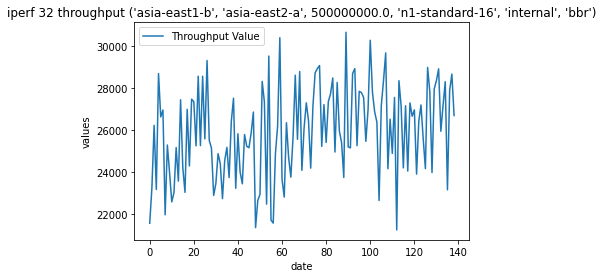

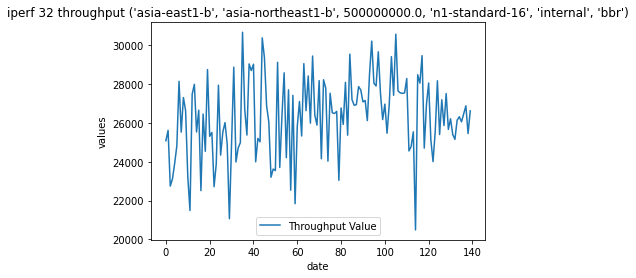

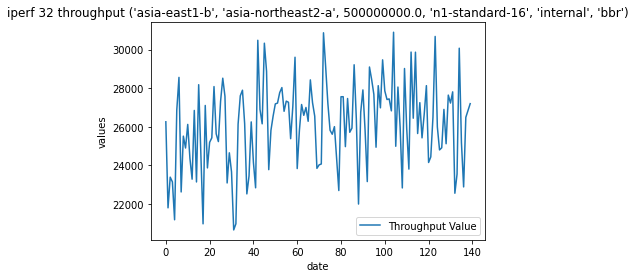

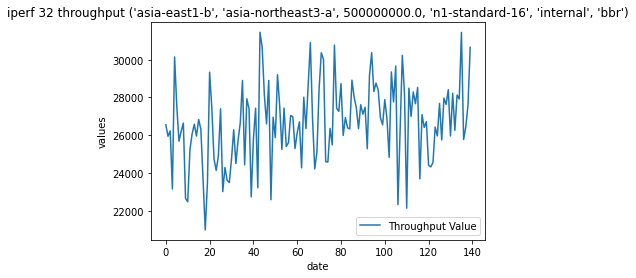

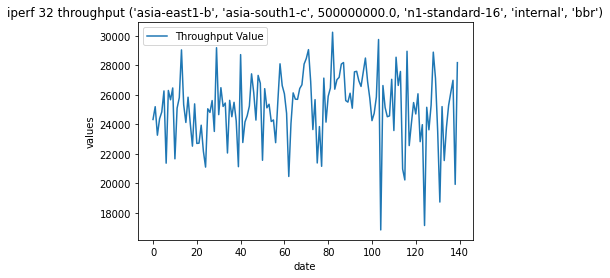

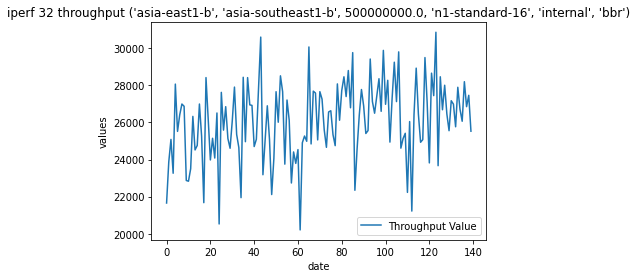

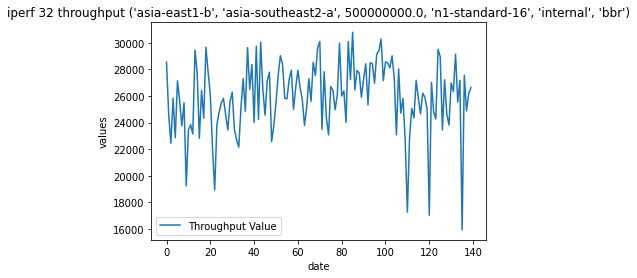

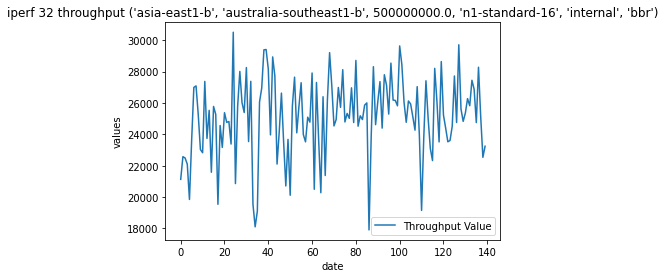

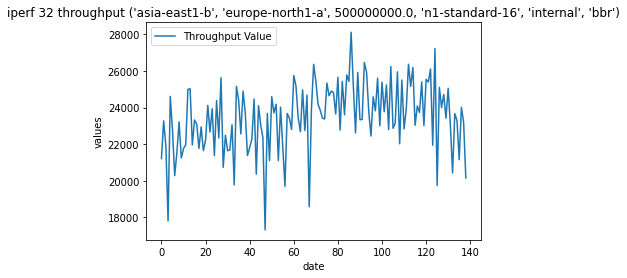

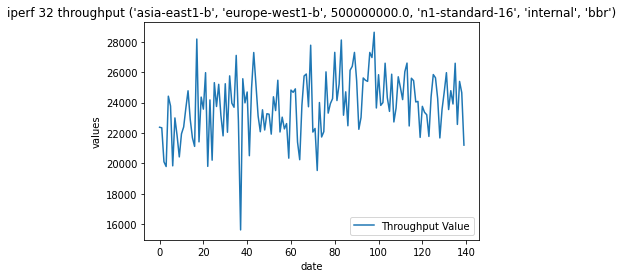

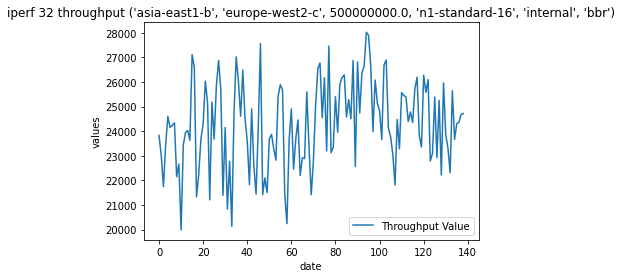

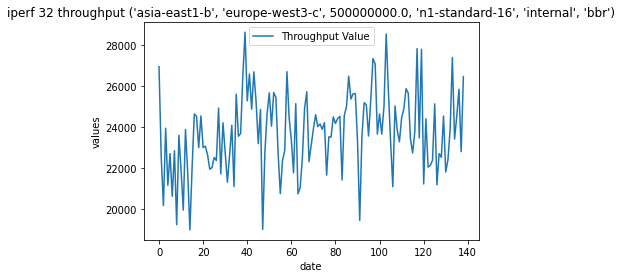

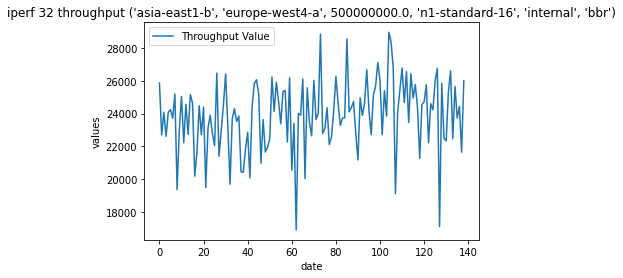

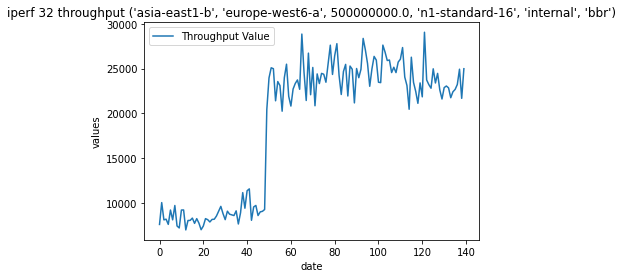

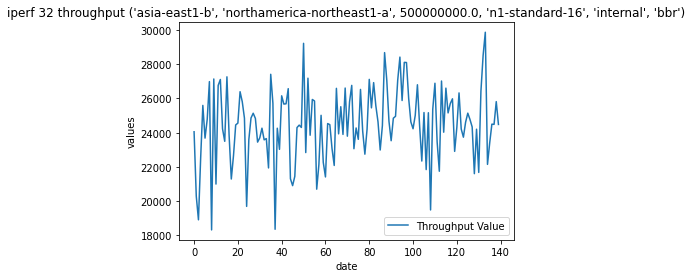

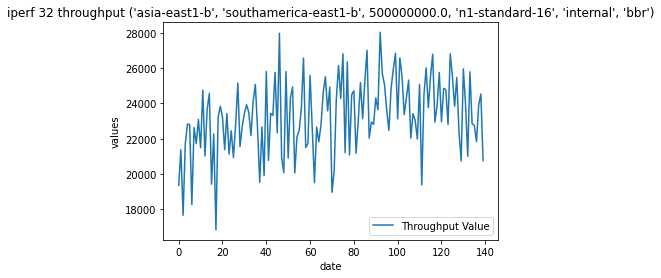

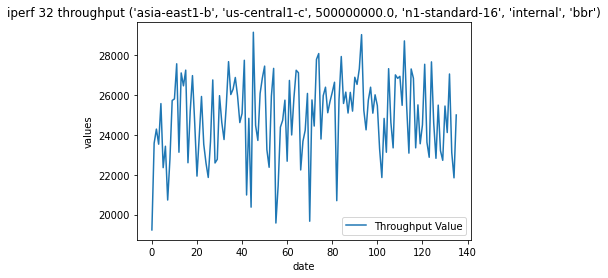

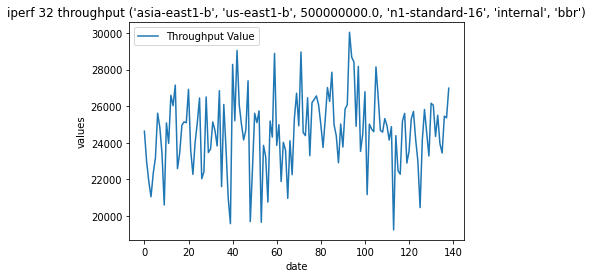

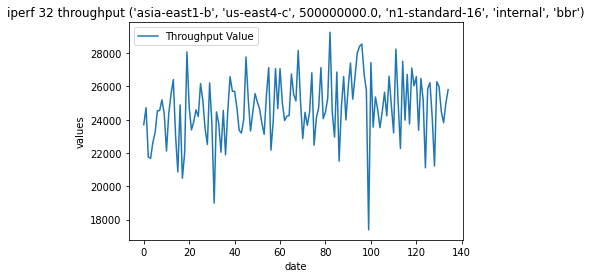

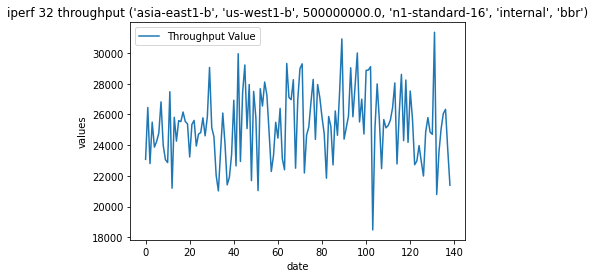

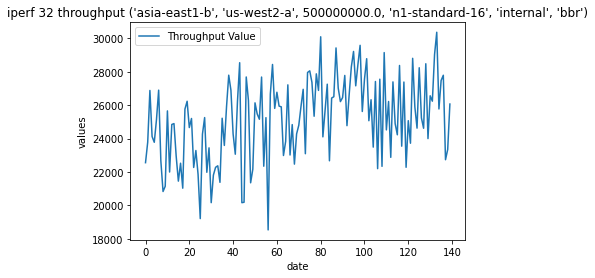

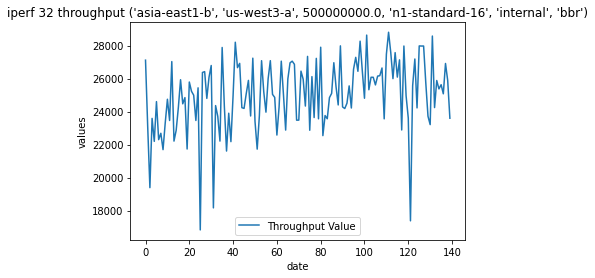

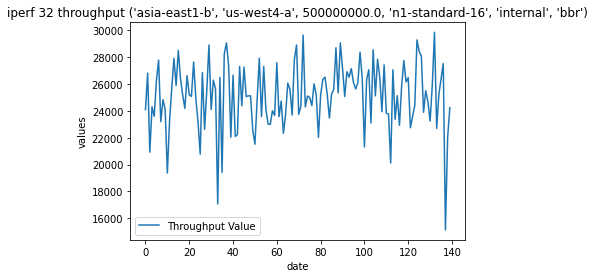

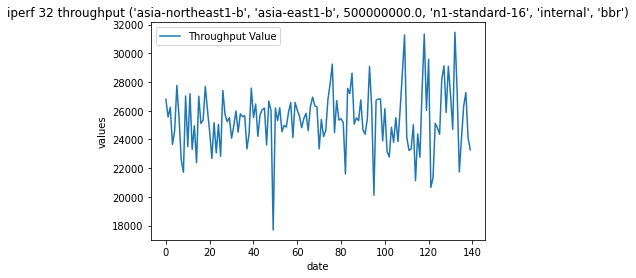

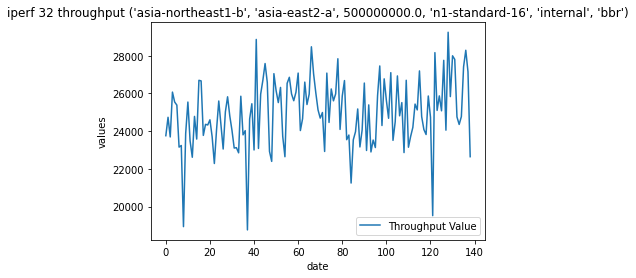

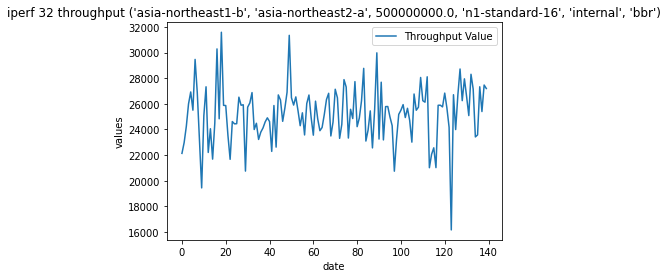

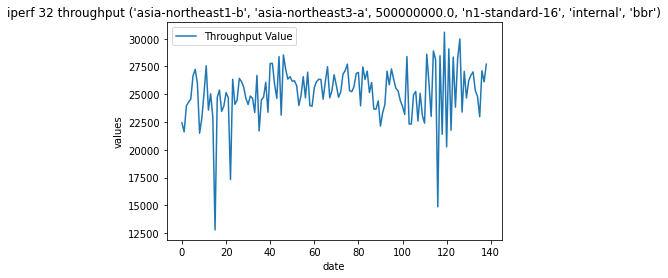

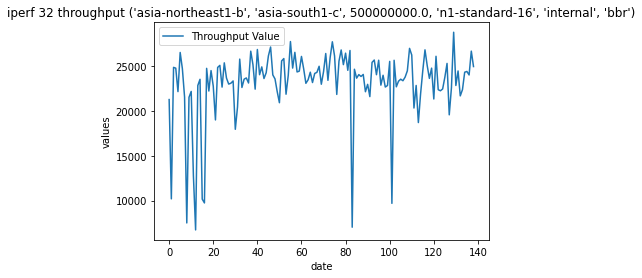

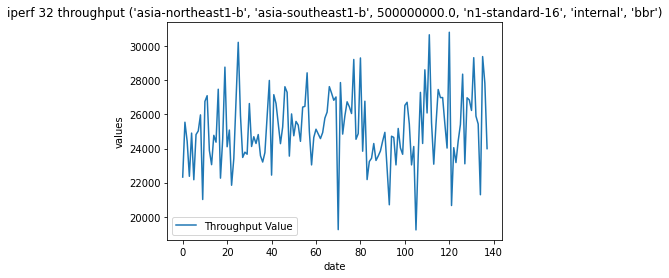

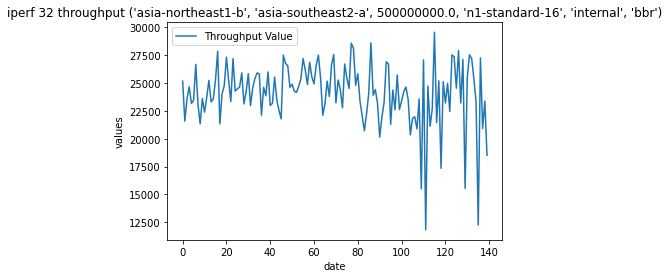

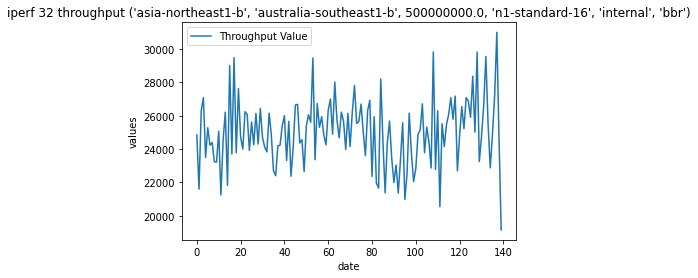

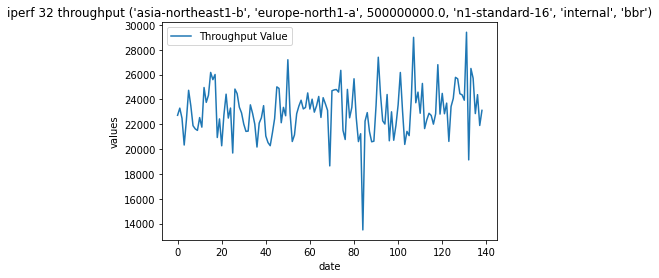

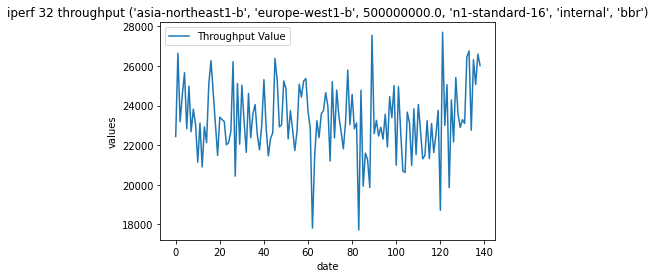

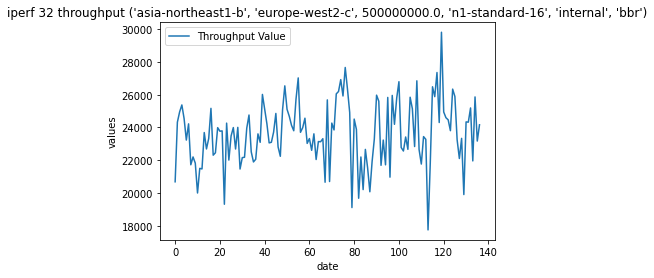

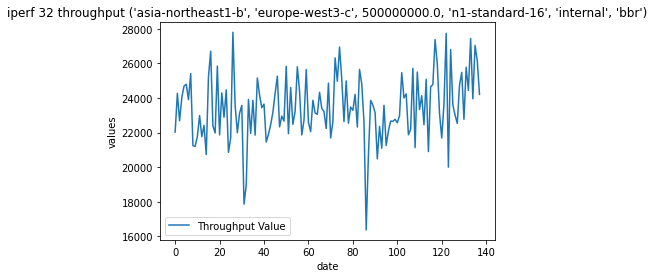

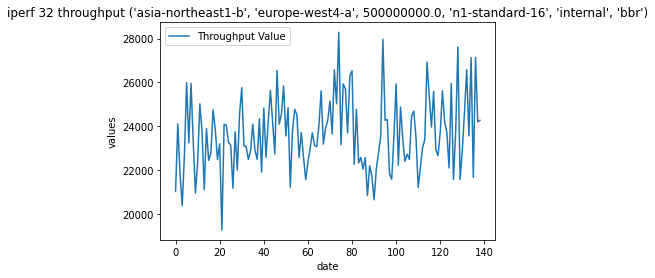

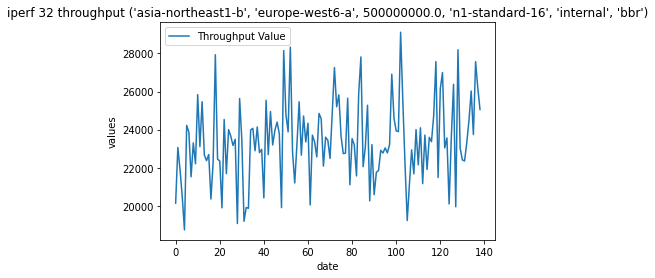

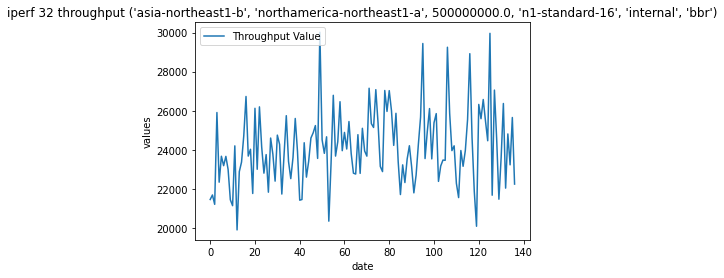

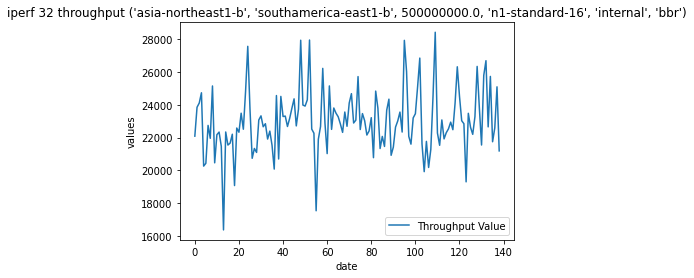

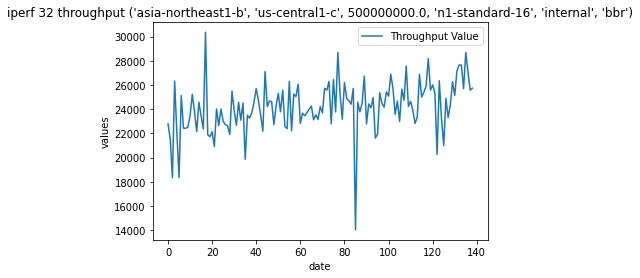

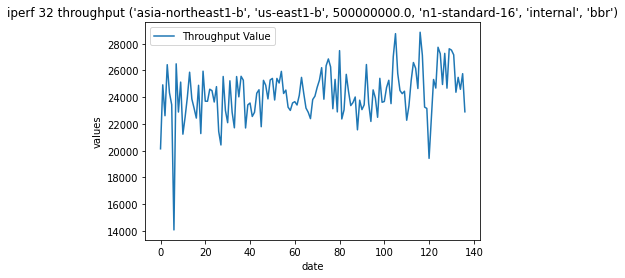

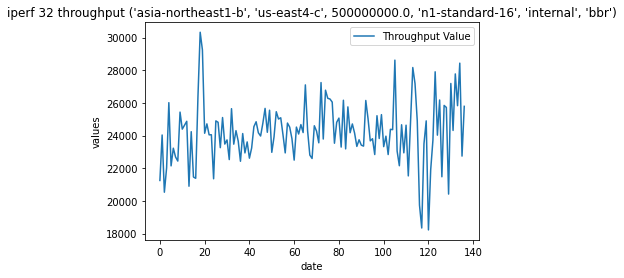

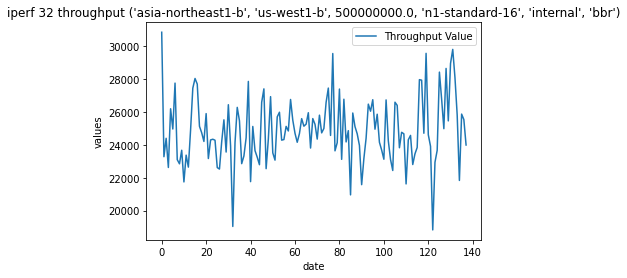

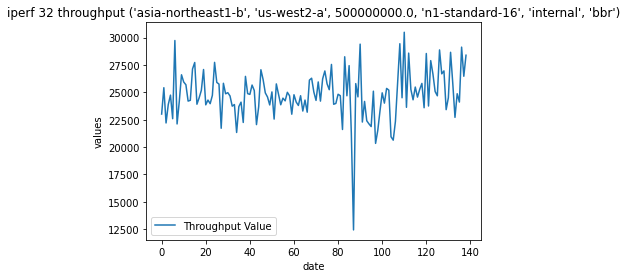

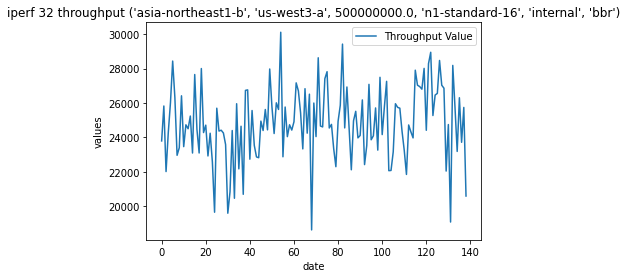

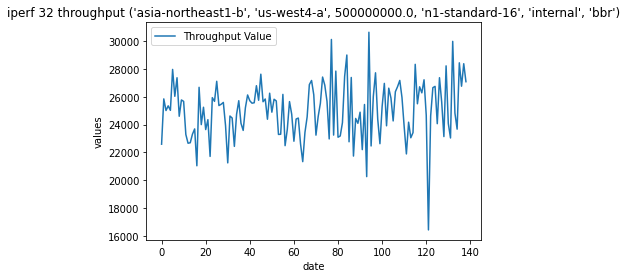

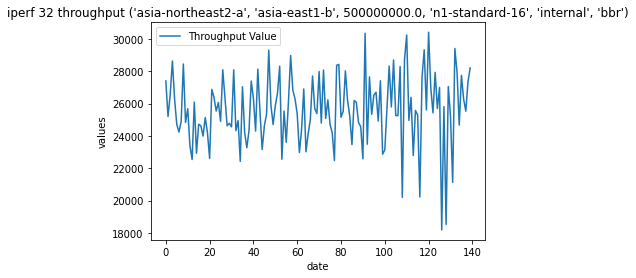

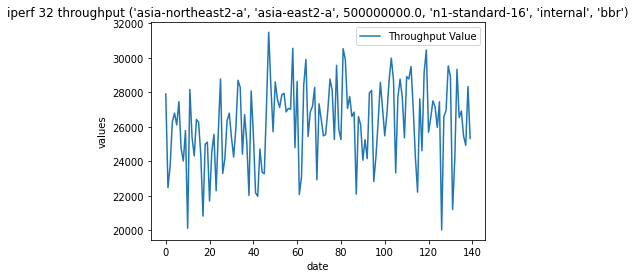

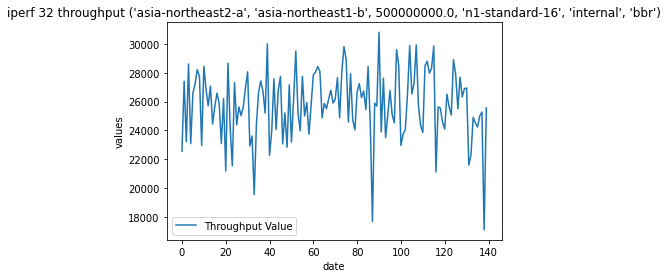

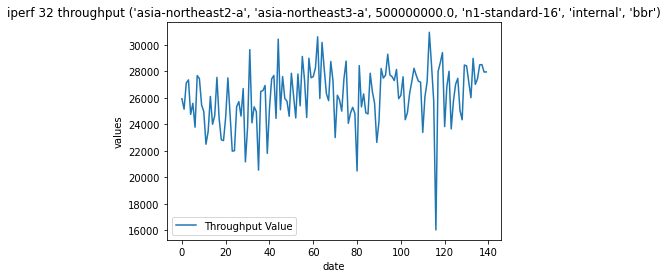

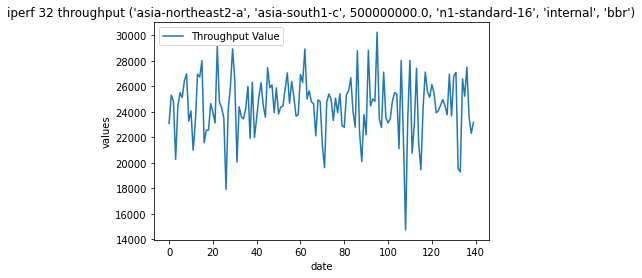

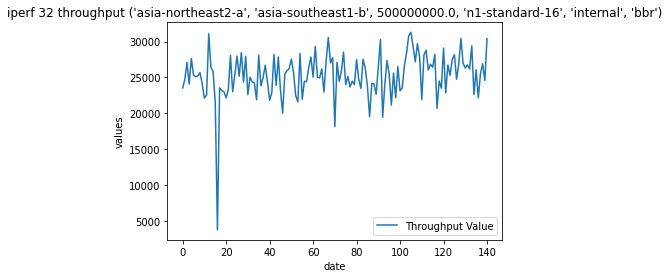

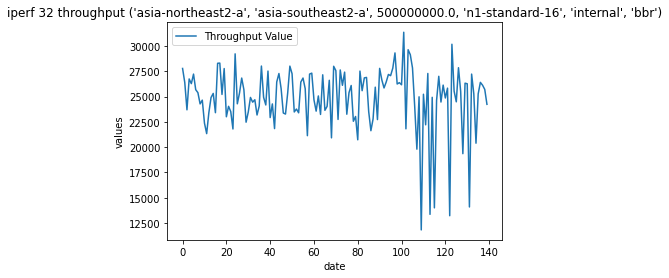

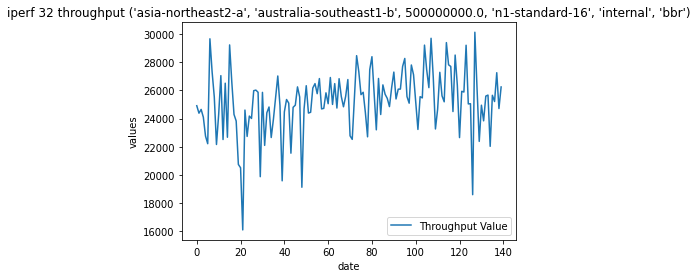

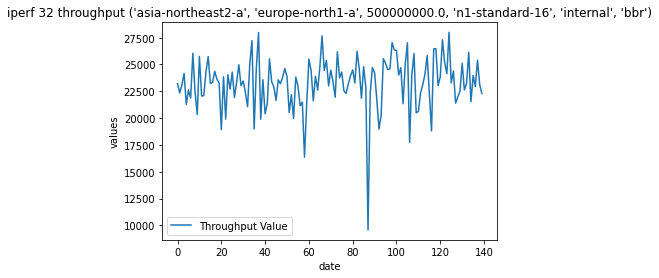

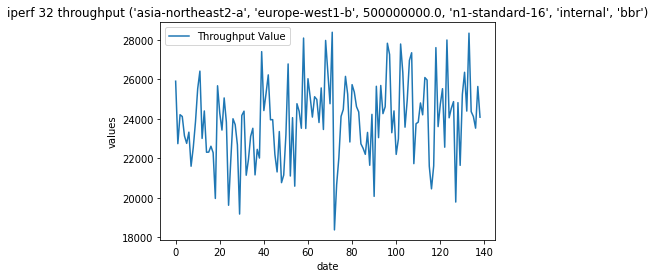

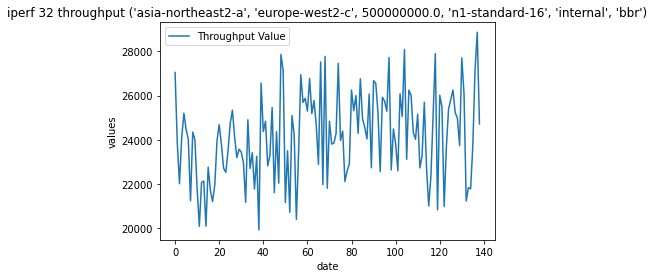

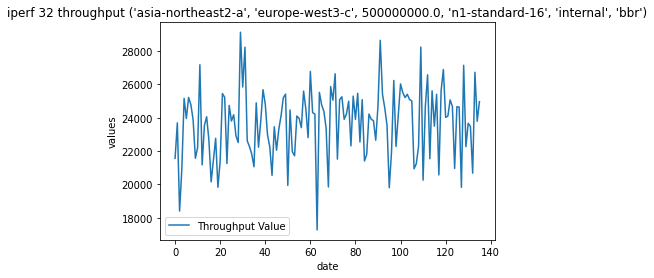

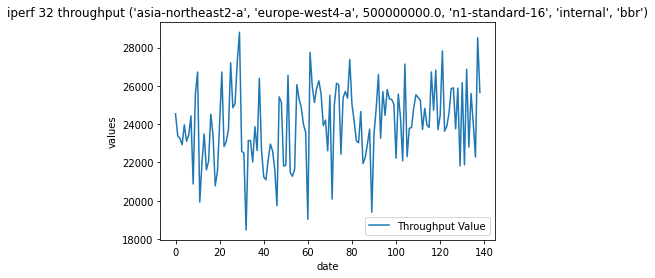

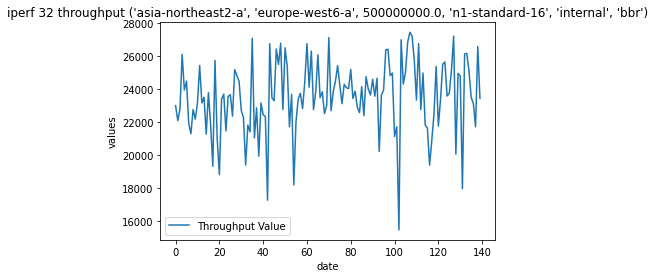

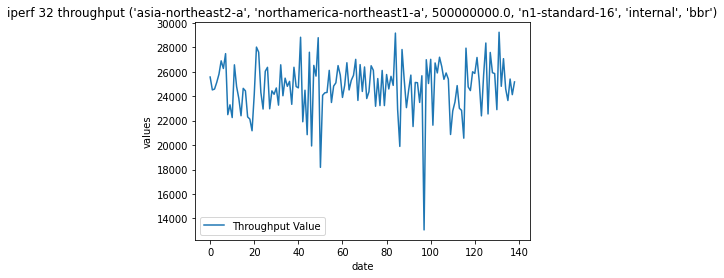

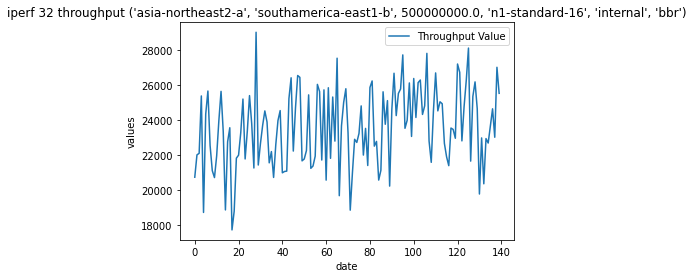

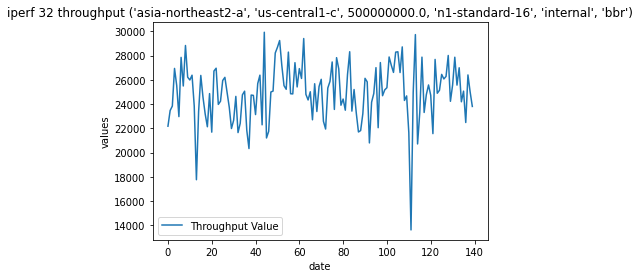

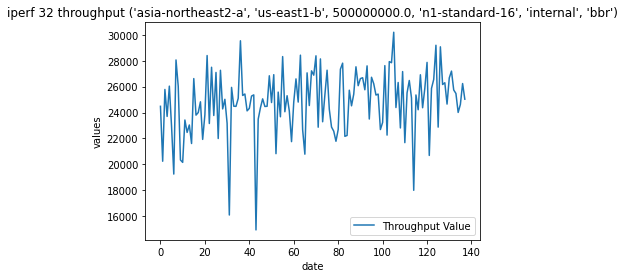

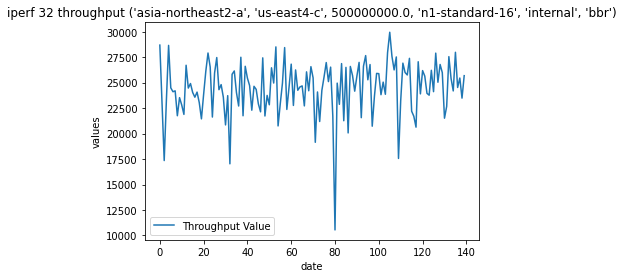

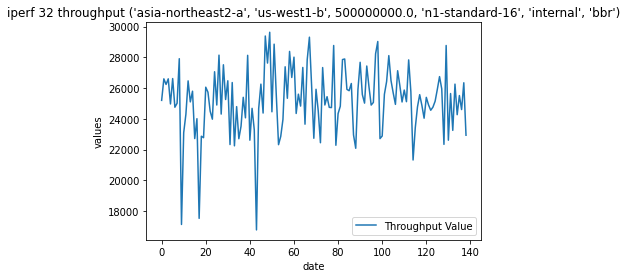

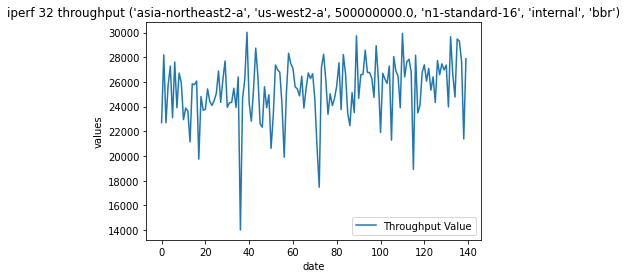

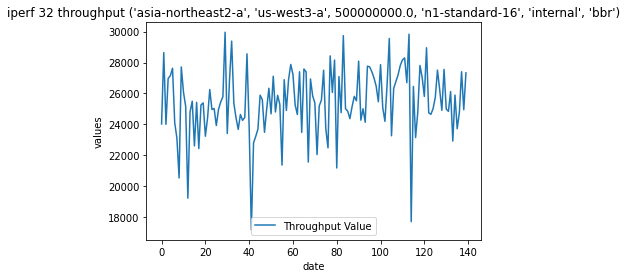

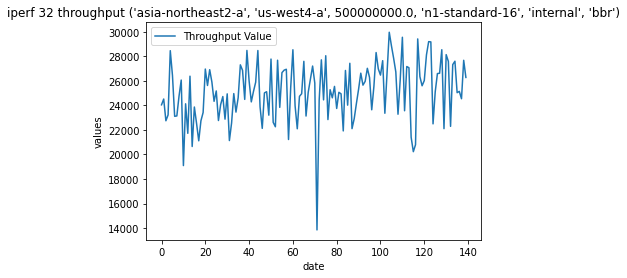

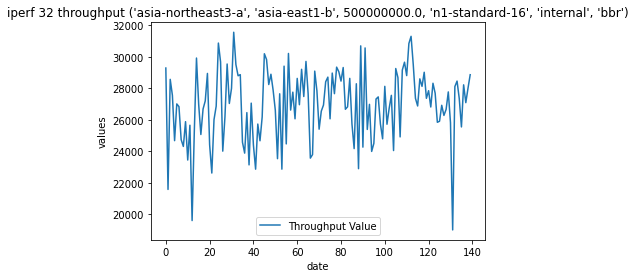

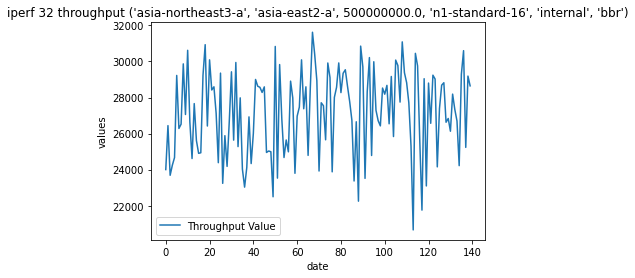

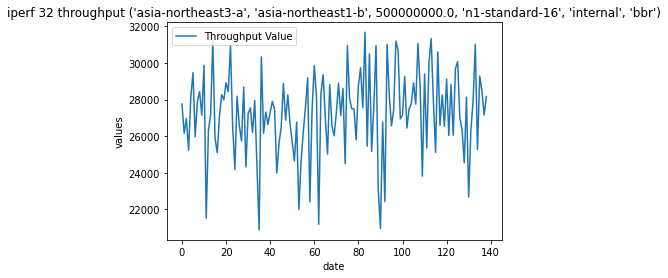

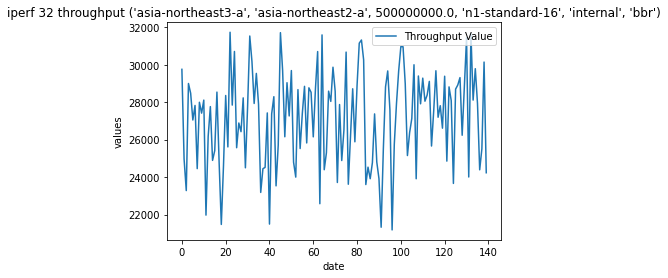

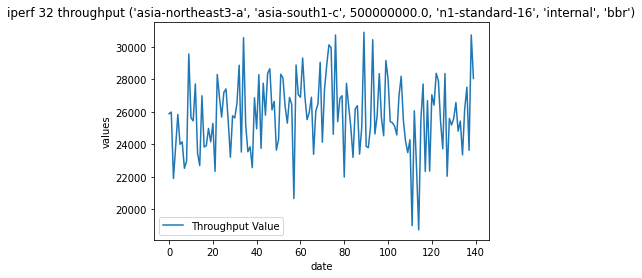

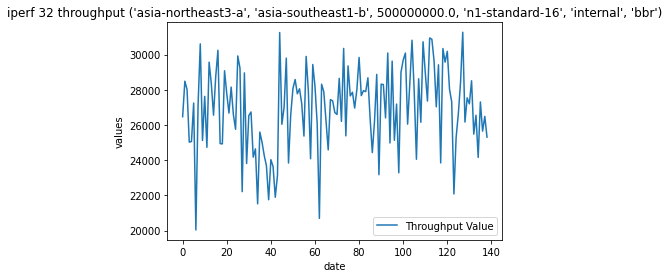

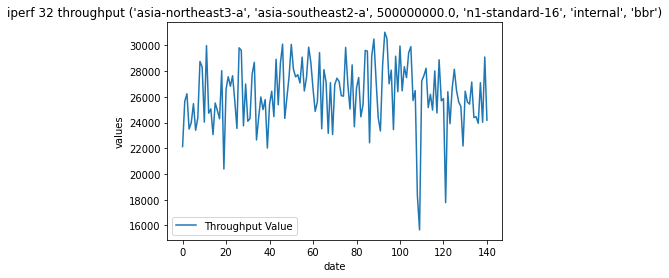

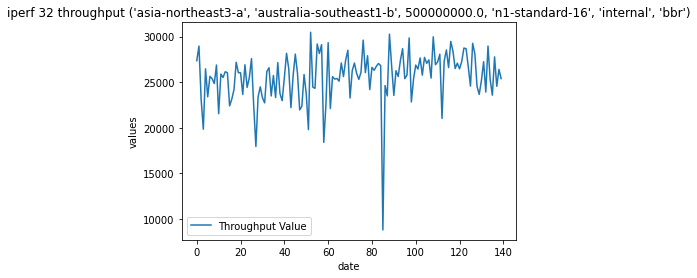

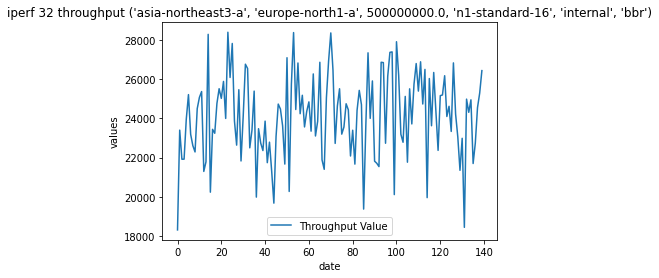

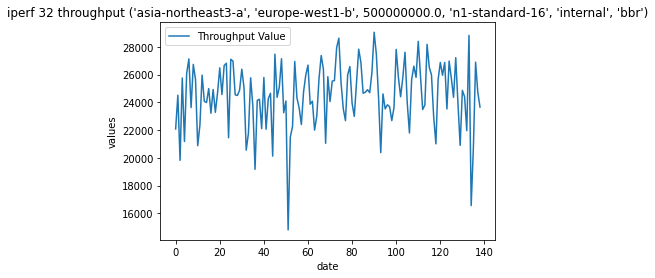

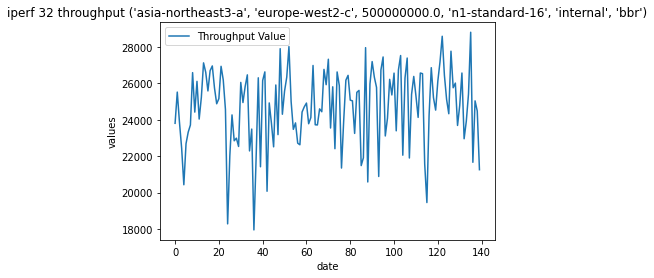

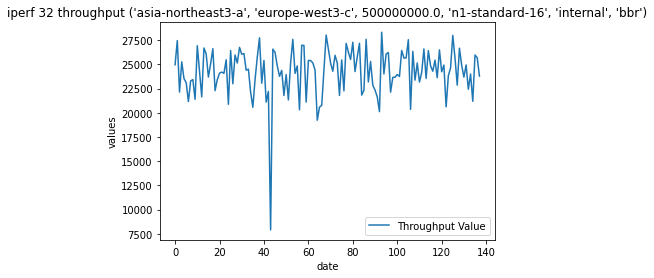

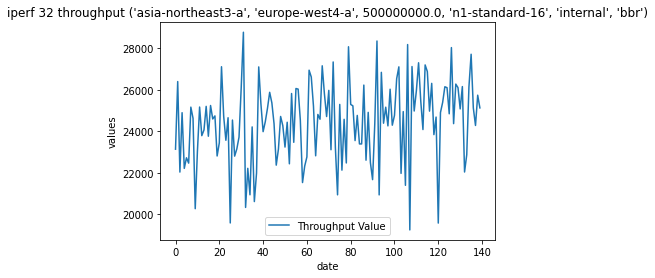

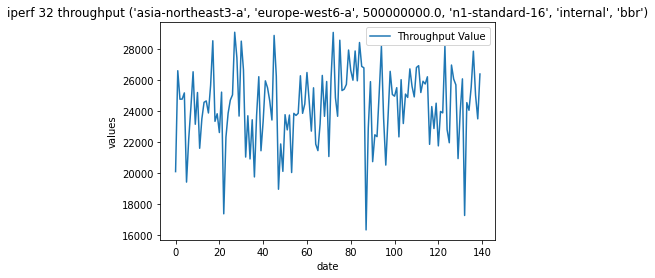

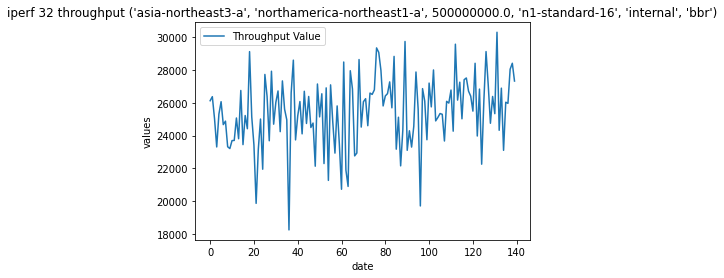

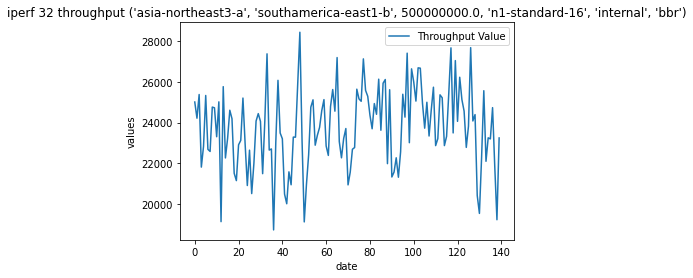

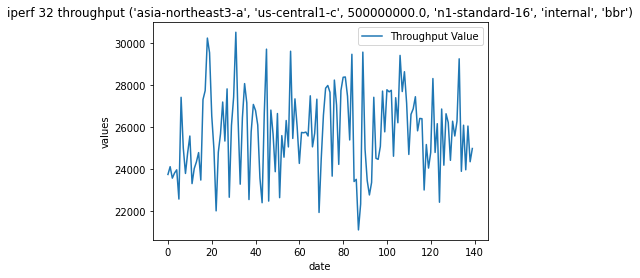

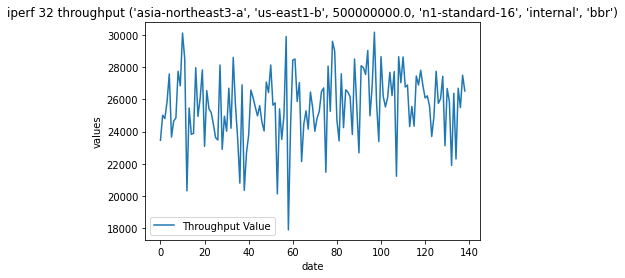

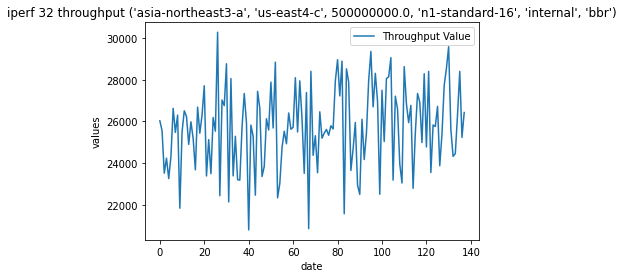

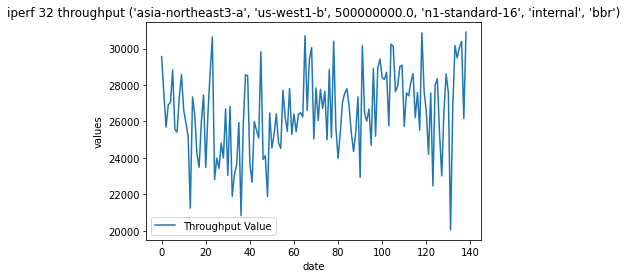

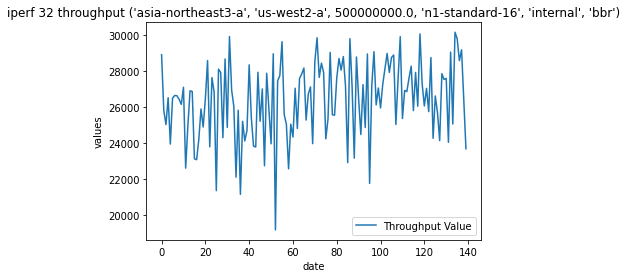

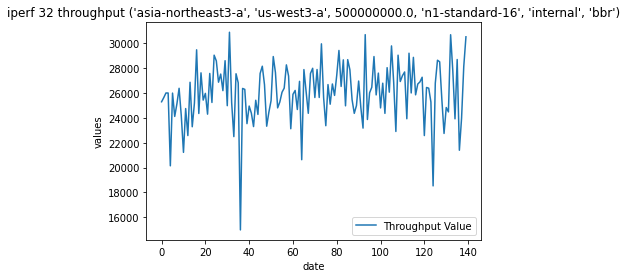

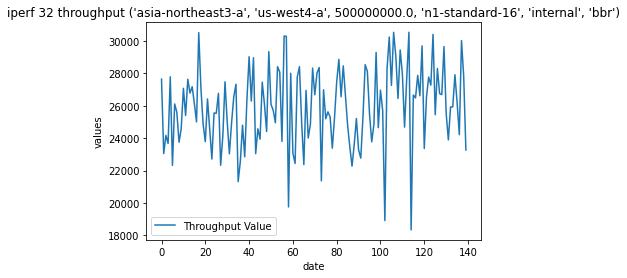

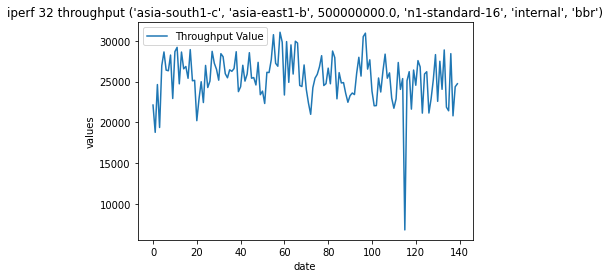

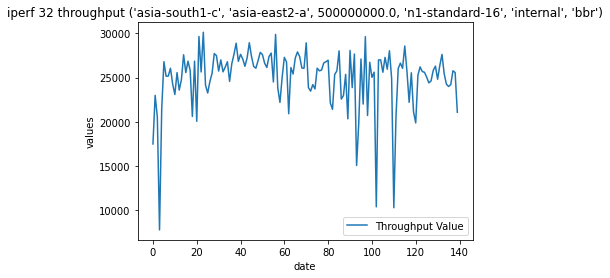

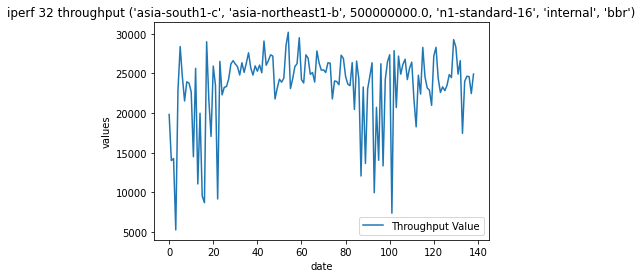

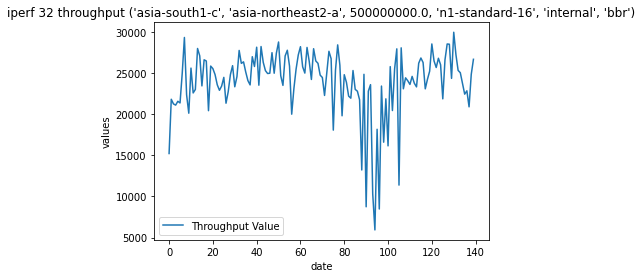

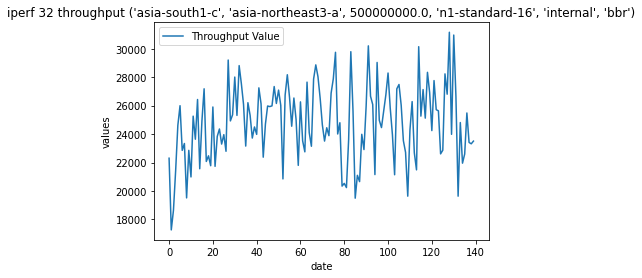

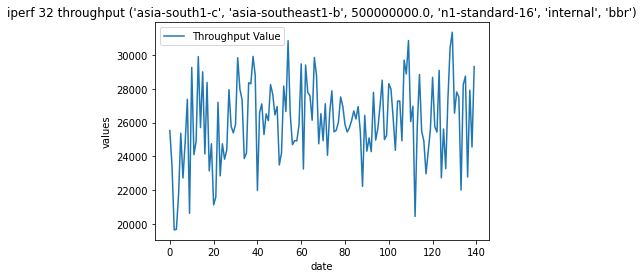

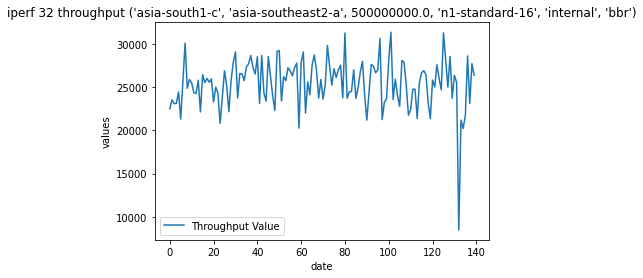

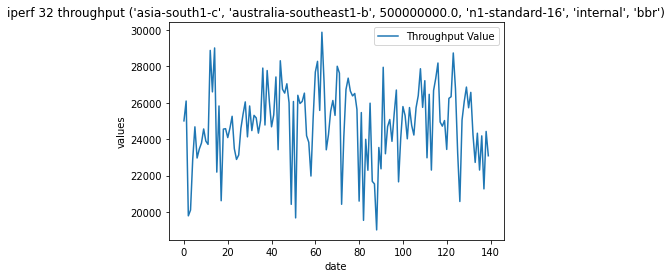

In [314]:
count = 0
for g in group_list:
  count += 1
  if count > 100:
    break
  
  group_values = gb.get_group(g).values.tolist()
  timestamps = []
  iperf_32_values = []
  for value in group_values:
    timestamps.append(value[0])
    iperf_32_values.append(value[2])

  plt.plot(iperf_32_values)
  # plt.plot(train_history.history['val_accuracy'])
  plt.title(f'iperf 32 throughput {str(g)}')
  plt.ylabel('values')
  plt.legend(['Throughput Value'])
  plt.xlabel('date')
  # plt.legend(['no_error', '0.1 error rate'], loc='upper left')
  plt.show()

In [ ]:
len(group_values)

In [ ]:
max_time_delta_sec = 30 * 60 * 60
min_time_delta_sec = 20 * 60 * 60
difference = group_values[1][0] - group_values[0][0]
difference.total_seconds()

In [ ]:
max_time_delta_sec 

In [ ]:
def min_percent_index(num, percent, offset):
    min_index = round((num-1)*percent) + offset
    if min_index >= num:
        min_index = num-1
    return min_index

def max_percent_index(num, percent, offset):
    max_index = round((num-1)*percent) + offset
    if max_index >= num:
        max_index = num-1
    return max_index

In [ ]:
group_list_position = 0
horizon = 0
window = 5
step = 1
# Max time delta = 30 hours
max_time_delta_sec = 30 * 60 * 60
current_group = group_list[group_list_position]
min_index = 0
max_index = 69
max_index = max_index - horizon
i = min_index + window

sample_list = []
target_list = []

rows = np.arange(i, max_index+1)
  # print("i: ", i)
  # print("max index: ", max_index)
  # print(rows)

for j,row in enumerate(rows):
  low_index = rows[j] - window
  high_index = rows[j]
  sample = group_values[low_index:high_index:step]
  target = group_values[rows[j] + horizon]
  
  # Check dates of sample to make sure there are no gaps
  bad_sample = False
  for sample_index in range(1, len(sample)):
    difference = sample[sample_index][0] - sample[sample_index-1][0]
    delta_in_seconds = difference.total_seconds()
    if delta_in_seconds > max_time_delta_sec:
      bad_sample = True
  
  if bad_sample:
    continue
    

  # print("j: ", rows[j])
  # print(sample)
  # print(target)
  sample_list.append(sample)
  target_list.append(target)

In [ ]:
len(sample_list)

In [ ]:
sample_list[0]

In [ ]:
import pandas_data_util

In [ ]:
filename = 'data/bq-results-20211029-114839-fy49t32j30hp.csv'
train_percent=0.6
valid_percent=0.2
normalize=0
Data = pandas_data_util.DataUtil(filename,
                train_percent,
                valid_percent,
                horizon,
                window,
                normalize)

In [ ]:
Data.train[0][2]

In [ ]:
Data.train[1][0]

In [ ]:
len(Data.train[0])

In [ ]:
len(Data.test[0])

In [ ]:
len(Data.valid[0])